# Capstone Project 2: EDA 

This EDA will be focusing on selecting the relevent features from 79. And use them to build the predictive models. 

I borrowed a lot of ideas from the below kaggle works

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

https://www.kaggle.com/marsggbo/kaggle

The dataset is download from Kaggle. It is about house price. The goal will be use this dataset and build a predictive model for house pricing.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

## The objective 
The objective of this project would be building a predictive model for house pricing. The result can be used to negotiate house price.
The modeling method can be logistic regression, random forest, gradient boosting, and SVM...
And compare them and pick the best performance one for prediction

### STEP1: Load the tools

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### STEP2: Load the dataset

In [2]:
# load the data for training validate and the model
dataset = pd.read_csv('./dataset_wrangling.csv')

### In the data wrangling step, I have already done some work to explore the data, drop some features with too many missing data, and remove outliers 

### STEP3: Data Preparation

In [3]:
# set the 'Id' column to be the index
dataset.set_index('Id', inplace=True)
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
features = dataset.columns
features

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

### STEP4: Analysing Response Variable 'SalePrice'

In [5]:
# descriptive statistics summary
dataset['SalePrice'].describe()

count      1446.000000
mean     179886.753804
std       78485.429780
min       34900.000000
25%      129900.000000
50%      162250.000000
75%      213000.000000
max      755000.000000
Name: SalePrice, dtype: float64

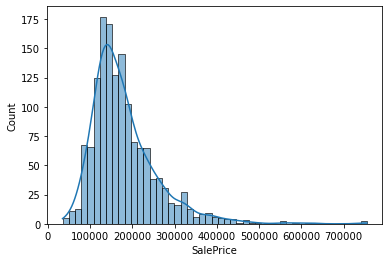

In [6]:
# histogram
sns.histplot(dataset['SalePrice'], kde=True);

可以看到与使用matplotlib作的直方图最大的区别在于有一条密度曲线（KDE），可以通过设置参数去掉这条默认的曲线。 另外由上图可以知道房价呈现正态分布。下面还可以看到两个统计学中的概念： 峰度（Kurtosis）和 偏度（Skewness）。

峰度：峰度（Kurtosis）是描述某变量所有取值分布形态陡缓程度的统计量。

它是和正态分布相比较的。

Kurtosis=0 与正态分布的陡缓程度相同。

Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰

Kurtosis<0 比正态分布的高峰来得平台——平顶峰计算公式：β = M_4 /σ^4 偏度：

偏度：偏度（Skewness）是描述某变量取值分布对称性的统计量。

Skewness=0 分布形态与正态分布偏度相同
Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。
Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。 计算公式： S= (X^ - M_0)/δ Skewness 越大，分布形态偏移程度越大。

In [7]:
# skewness and kurtosis

print("Skewness: ", dataset['SalePrice'].skew())
print("Kurtosis: ", dataset['SalePrice'].kurt())

Skewness:  1.9011894036482186
Kurtosis:  6.799538094661621


#### The distribution of 'SalePrice' is not normal. It is very steep and has a right tail.

### STEP5: mulvariate analysis

#### 5.1 Categorical features

In [8]:
categorical = dataset.select_dtypes('object')

In [9]:
col_categorical = categorical.columns
col_categorical

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

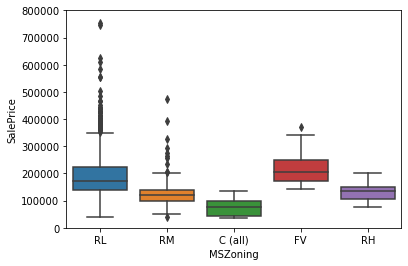

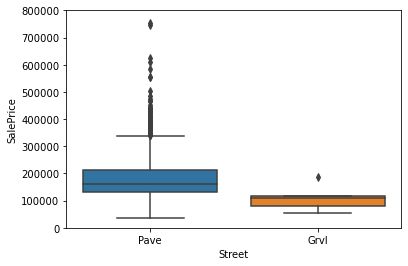

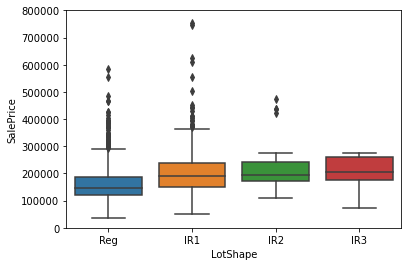

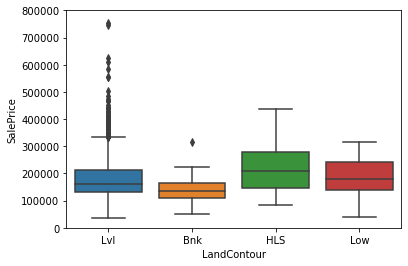

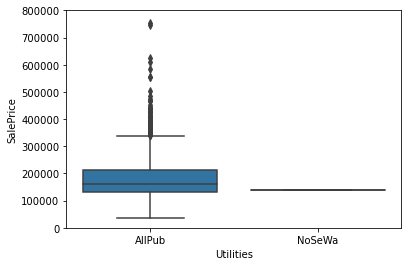

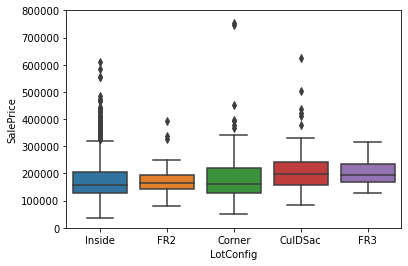

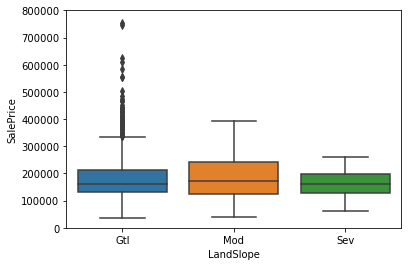

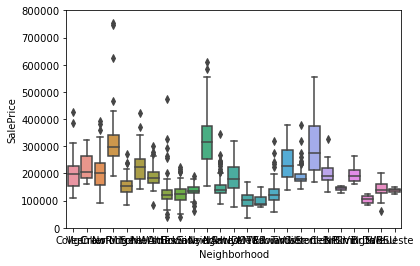

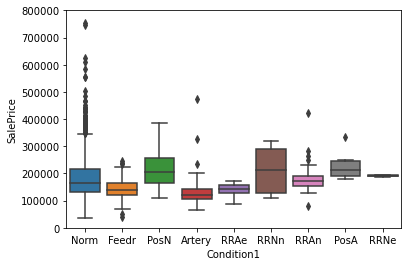

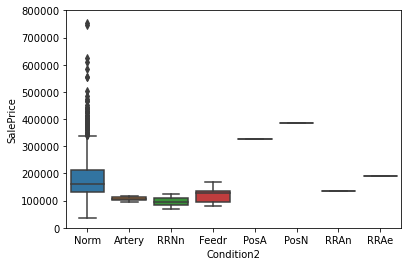

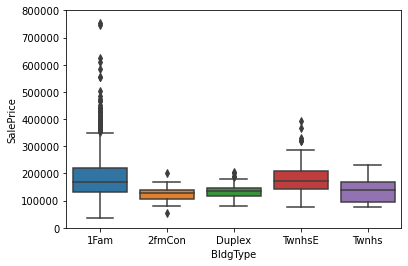

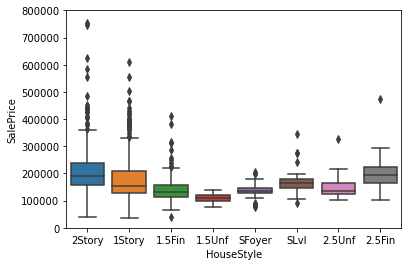

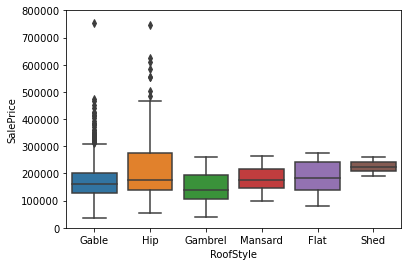

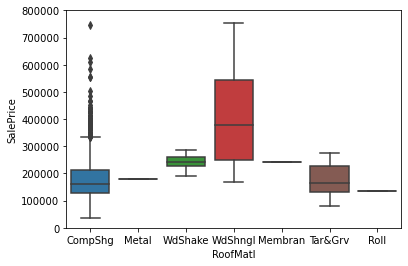

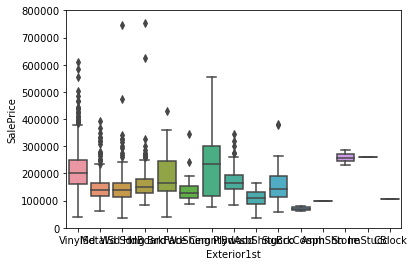

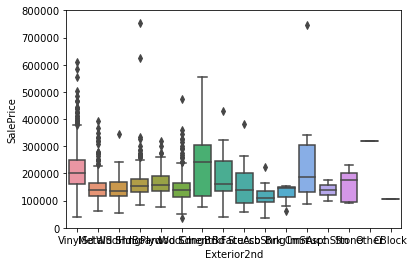

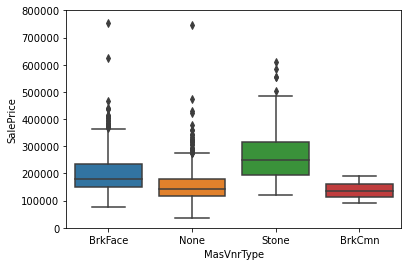

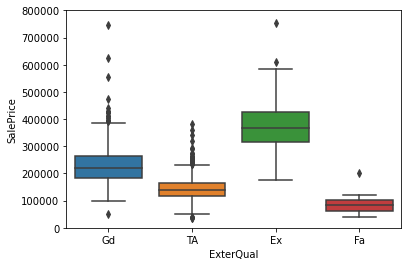

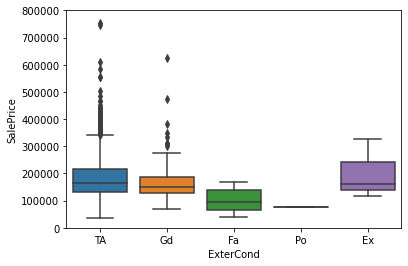

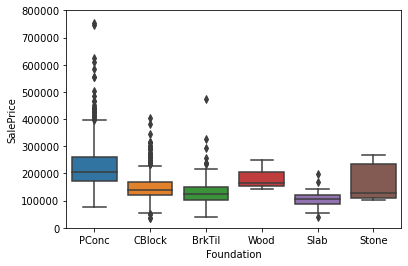

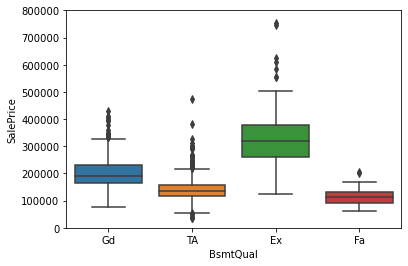

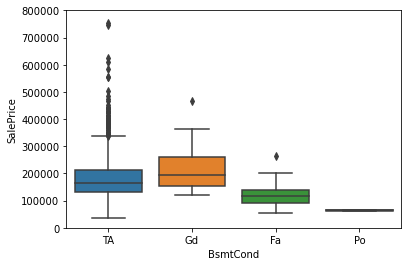

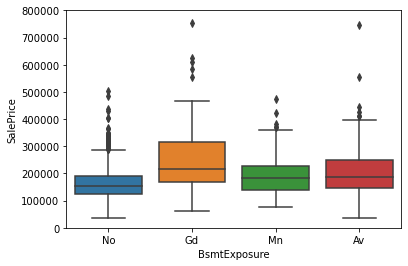

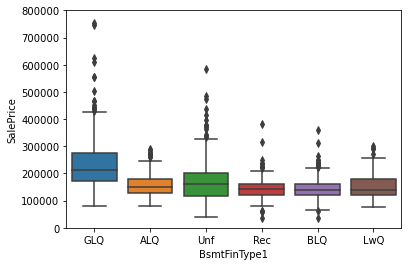

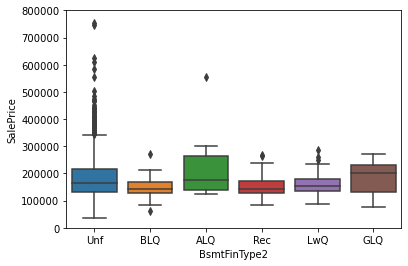

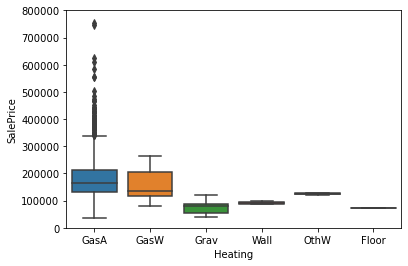

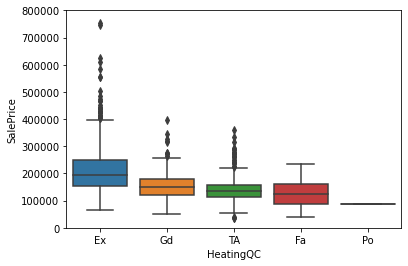

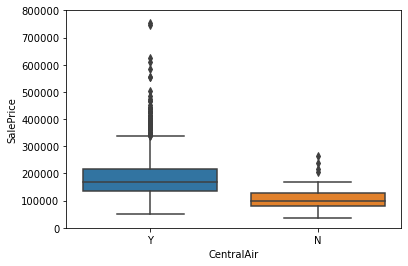

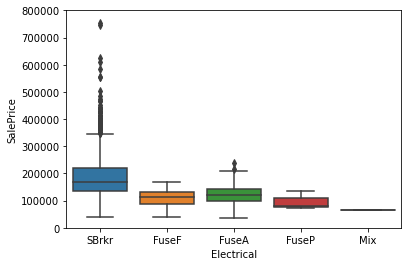

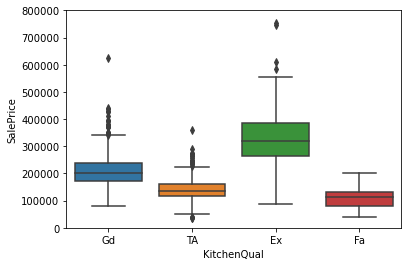

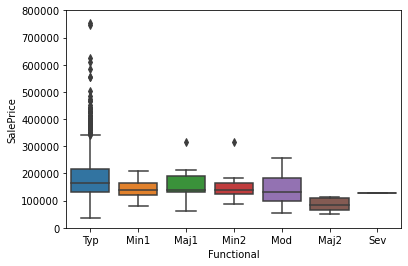

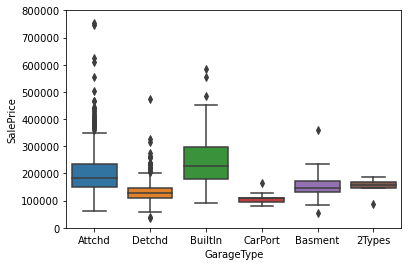

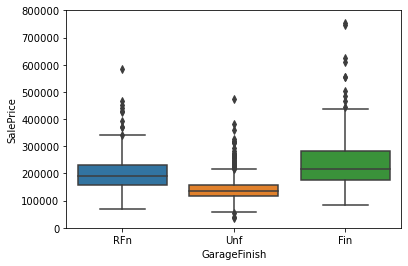

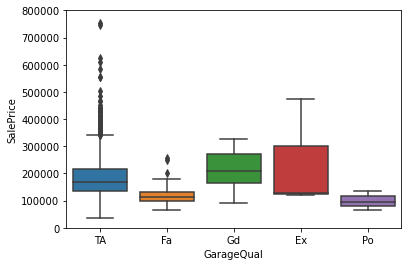

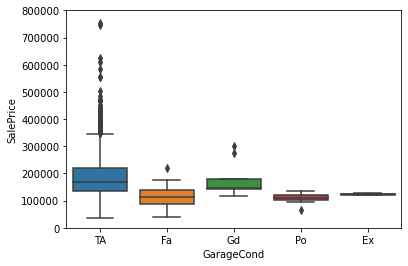

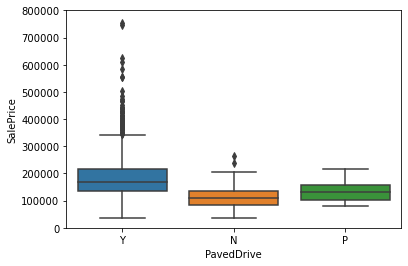

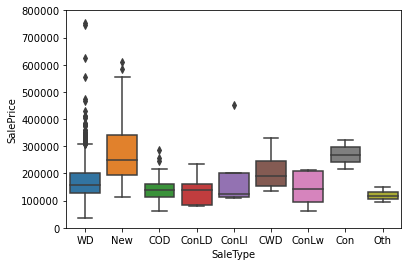

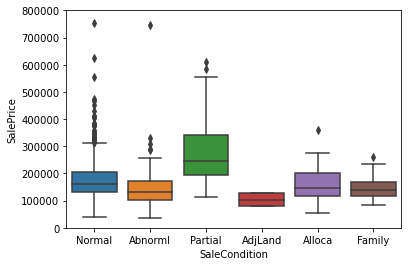

In [10]:
cols_categorical = []

for col in col_categorical:
    data = pd.concat([dataset['SalePrice'], dataset[col]], axis=1)
    fig = sns.boxplot(x=col, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)
    plt.show()

'CentralAir', 'Neighborhood' look have some influence on 'SalePrice'.

#### 5.2 Numerical features

In [11]:
numerical = dataset.select_dtypes(exclude='object')

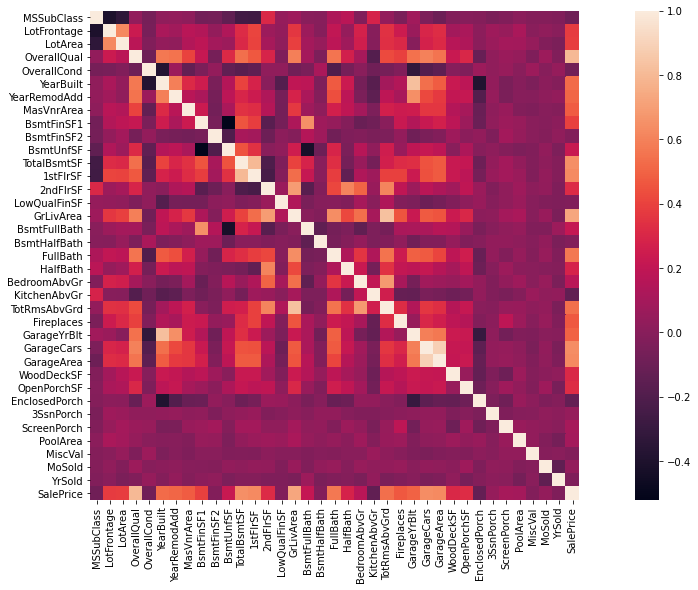

In [12]:
corrmat = dataset.corr()
plt.figure(figsize=(20, 9))
sns.heatmap(corrmat, square=True);

#### Among those features, 'OverallQual', 'GrLivArea', 'TotalBasmtSF', '1stFlrSF', 'GarageCars', 'GarageArea' have high correlation with 'SalePrice'.

<AxesSubplot:>

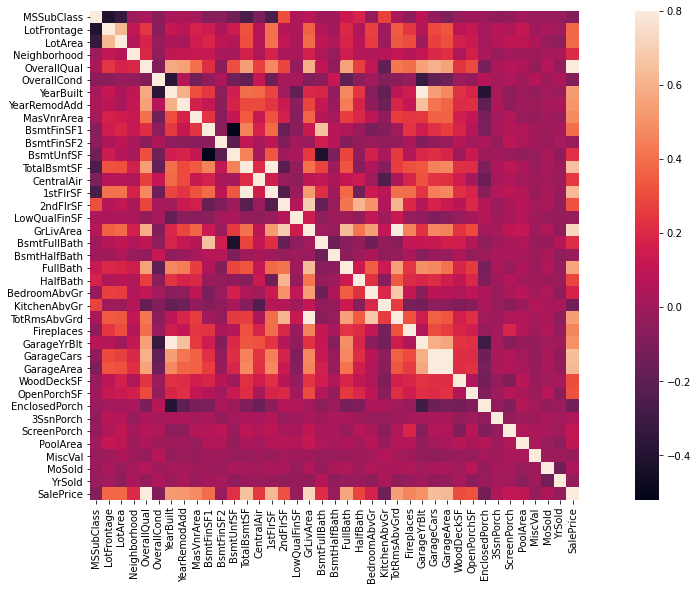

In [13]:
from sklearn import preprocessing
f_names = ['CentralAir', 'Neighborhood']
for x in f_names:
    label = preprocessing.LabelEncoder()
    dataset[x] = label.fit_transform(dataset[x])
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

'CentralAir', 'Neighborhood' don't have strong correlation with 'SalePrice'. So we are not going to use them.

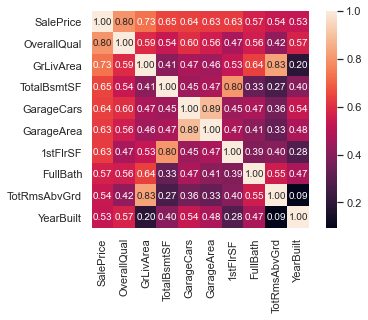

In [14]:
k  = 10 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt' are having strong correlations with 'SalePrice'.  'GarageCars', 'GarageArea' should be the same thing. We are going to keep 'GarageArea' as it is continue data.

So we are going to use those features for modeling building.
They are 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt' 

In [19]:
cols = [ 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

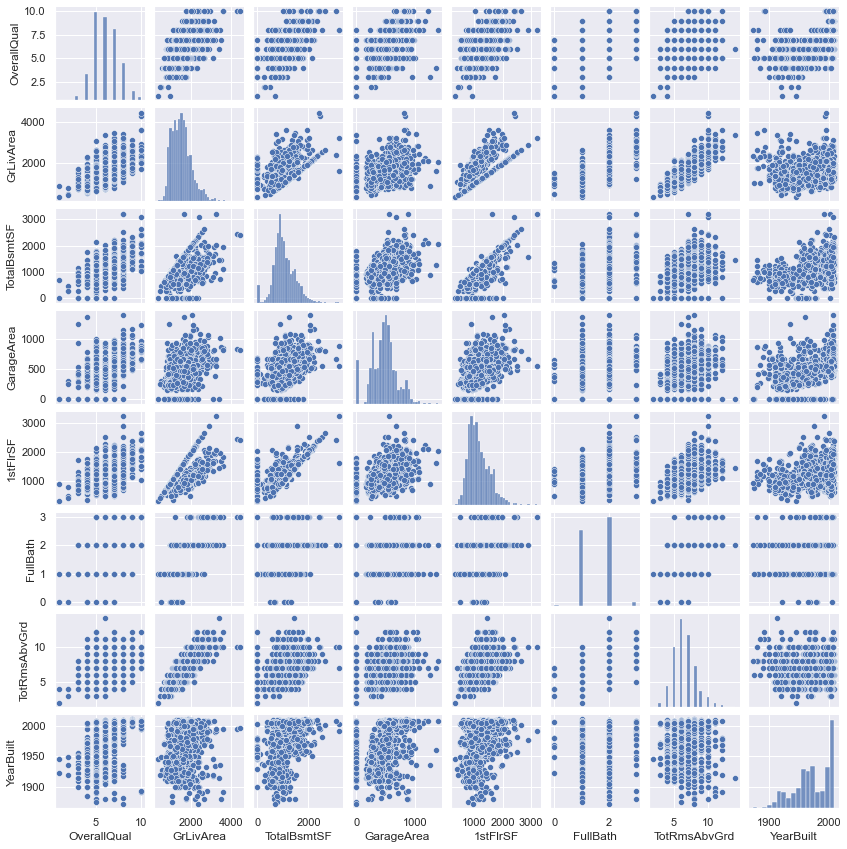

In [20]:
sns.set()
sns.pairplot(dataset[cols], size=1.5)
plt.show()

### STEP6 Save the data for preprocessing

In [21]:
## save those features 
cols.append('SalePrice')
dataset[cols].to_csv('dataset_EDA_v2.csv')

In [22]:
#df = pd.read_csv('dataset_EDA_v2.csv')
#df.head()